In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import mean_squared_error,confusion_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.ensemble import RandomForestClassifier as RFC
#from lightgbm import LGBMRegressor
plt.style.use('seaborn-darkgrid')
np.set_printoptions(precision=2)

In [107]:
train_df = pd.read_csv('train.csv')
train_df['EJ'] = train_df['EJ'].apply(lambda x: 0 if x=='A' else 1)
train_df.head(5)

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,...,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,...,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,...,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,...,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,...,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1


In [108]:
train_id = train_df.iloc[:,0]
train_x = train_df.iloc[:,1:-1]
train_y = train_df.iloc[:,-1]
train_null = train_x.isnull()

In [109]:
train_x.head(5)

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL
0,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,4126.58731,...,3.583450,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343
1,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,5496.92824,...,10.358927,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000
2,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,5135.78024,...,11.626917,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941
3,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,4169.67738,...,14.852022,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829
4,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,5728.73412,...,13.666727,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614


In [110]:
#欠損チェック
cols = train_x.columns
#full:完全データのカラム番号をリスト化
full_list = []
#null：不完全データのカラム番号をリスト化
null_list = []
for idx,col in enumerate(cols):
    if len(train_x[col].isnull().unique()) >1:
        null_list.append(idx)
    else:
        full_list.append(idx)

In [111]:
null_list

[12, 15, 16, 32, 40, 43, 47, 49, 55]

In [112]:
#欠損しているデータ数を調査
for col in null_list:
    print(len(train_null[train_null.iloc[:,col]==True]))

60
2
3
1
60
1
1
2
1


In [113]:
#欠損しているデータ数を調査
pred_list = []
for col in null_list:
    lm = LinearRegression()
    pred_df = train_x[train_null.iloc[:,col]==False]
    pred_x = pred_df.iloc[:,full_list]
    pred_y = pred_df.iloc[:,col]
    lm.fit(pred_x,pred_y)
    predict_y = lm.predict(pred_x)
    print(mean_squared_error(pred_y,predict_y))    
    pred_list.append(lm.predict(train_x.iloc[:,full_list]))

5946.814339136159
21687.709484616422
0.03858782509863775
19.084507885263086
1106.468049172493
18727.379341614796
62.37383303470941
1.5597673044804647
3.7583946176967893


In [114]:
#欠損補正予測と実測値を比較
null_df = pd.DataFrame()
emb_df = pd.DataFrame()
for idx,col in enumerate(null_list):
    null_df[col] = train_x.iloc[:,col]
    emb_df[col] = pred_list[idx]

In [115]:
#欠損値の補完:重回帰分析
train_df_emb = train_x
#null_idxは欠損値が含まれていた要素番号をカラム毎にリスト化したもの
null_idx = []
for col in null_list:
    for idx,data in enumerate(null_df[col]):
        if np.isnan(data):
            null_df[col][idx] = emb_df[col][idx]
            null_idx.append(idx)
    train_df_emb.iloc[:,col] = null_df[col]
null_idx = list(set(null_idx))

In [116]:
#欠損値の補完:平均値
train_df_emb_1 = train_x
for col in null_list:
    ave = train_x.iloc[:,col].mean()
    for idx,data in enumerate(null_df[col]):
        if np.isnan(data):
            null_df[col][idx] = ave            

In [117]:
#欠損値の補完:最頻値
train_df_emb_2 = train_x
for col in null_list:
    ave = train_x.iloc[:,col].mode()
    for idx,data in enumerate(null_df[col]):
        if np.isnan(data):
            null_df[col][idx] = ave            

In [118]:
null_idx

[128,
 516,
 517,
 263,
 8,
 264,
 266,
 15,
 272,
 529,
 18,
 23,
 279,
 153,
 281,
 283,
 537,
 285,
 24,
 289,
 166,
 422,
 45,
 46,
 48,
 177,
 305,
 562,
 178,
 304,
 568,
 570,
 316,
 573,
 64,
 449,
 579,
 196,
 582,
 71,
 583,
 458,
 330,
 594,
 341,
 469,
 471,
 88,
 602,
 603,
 375,
 356,
 358,
 231,
 615,
 233,
 490,
 235,
 236,
 363,
 364,
 492,
 369,
 114,
 244,
 119,
 253,
 507,
 125]

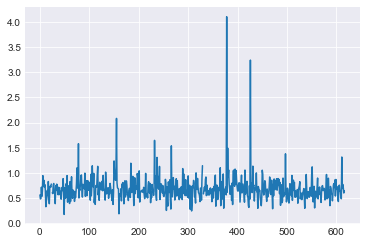

In [93]:
plt.plot(train_x.iloc[:,16])

In [119]:
#説明変数を標準化する
train_df_full = train_df.dropna(how='any')
train_id = train_df_full.iloc[:,0]
train_x_full = train_df_full.iloc[:,1:-1]
train_y_full = train_df_full.iloc[:,-1]
scaler = StandardScaler()
scaler.fit(train_x_full)
train_x_sc = pd.DataFrame(scaler.transform(train_x_full))

In [120]:
#相関係数行列を主成分分析
rmat = np.array(train_x_sc.corr())

pca = PCA()
pca.fit(rmat)
v_ratio = pca.explained_variance_ratio_
total = sum(v_ratio)
csum = []
add = 0
for v in v_ratio:
    add += v
    csum.append(add/total)

In [121]:
print(csum[7],csum[10],csum[20],csum[30])

0.78479053117612 0.8398435728863868 0.9343092051312057 0.9788831308870106


In [17]:
#主成分得点をペアプロット
train_pca_x = pd.DataFrame(pca.fit_transform(train_x_sc))

In [23]:
train_y_full

0      1
1      0
2      0
3      0
4      1
      ..
611    0
612    0
613    0
614    0
616    0
Name: Class, Length: 548, dtype: int64

In [28]:
pca_df = pd.DataFrame()
pca_df['Class'] = train_y_full.values
pca_df = pd.concat([pca_df,train_pca_x],axis=1)

In [29]:
pca_df

,Class,0,1,2,3,4,5,6,7,8,...,46,47,48,49,50,51,52,53,54,55
0,1,-1.694842,-0.980159,1.600700,0.905737,0.127142,0.131283,2.221265,-0.233517,-1.600980,...,-0.388892,-0.489903,-0.080381,0.226486,0.053125,-0.131783,-0.047703,0.088862,0.105935,0.062124
1,0,-1.487629,-1.495253,-1.199403,-0.599459,1.384905,-0.056250,-0.960883,-0.185945,-0.592689,...,-0.129907,-0.086580,0.120160,0.000976,0.155052,0.042689,-0.133510,0.068812,0.031475,-0.029208
2,0,0.074208,0.542641,1.019748,1.706604,-0.514623,-1.106023,-1.185910,-0.408944,0.506250,...,-0.314867,-0.020030,-0.325116,-0.476143,0.037055,0.138417,0.000326,0.056159,0.105031,-0.050119
3,0,-0.372733,0.343036,1.072374,1.441761,-1.412771,-1.047735,-0.750041,0.374120,0.121437,...,-0.271623,-0.324252,-0.081988,-0.087235,-0.350861,0.063241,0.034209,-0.028865,0.106668,-0.026202
4,1,-0.564624,0.852843,0.578999,1.759011,0.097731,0.436287,0.587154,0.447677,0.650938,...,-0.112703,-0.076973,-0.129483,-0.109839,0.438448,0.187414,0.675220,0.045586,0.100180,-0.010597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,0,-0.890932,-0.353078,-1.274557,-0.071657,0.925385,1.822422,-0.339174,-0.794495,0.785788,...,-0.265130,0.585934,0.218159,-0.050363,0.131979,-0.228701,-0.155509,0.025726,0.059897,-0.040886
544,0,-1.377330,-1.258851,-0.799064,-0.873549,0.738091,0.017707,1.587345,0.987943,0.470578,...,-0.144102,0.145065,0.515630,-0.030979,-0.403503,0.361030,0.161858,0.293505,0.003110,-0.047371
545,0,0.949310,1.609081,0.967554,-2.939322,-1.862912,0.879682,1.109133,-0.025624,0.579423,...,0.279625,-0.018701,-0.001883,0.038124,0.437990,0.171304,-0.117658,-0.057540,-0.084955,-0.075839
546,0,0.422411,-0.186865,-1.089473,-3.879356,-0.453600,1.809635,-1.386334,-0.718645,-0.551988,...,0.465922,0.336603,0.558842,0.095480,-0.173431,-0.415652,0.107811,-0.154910,0.054681,0.092674


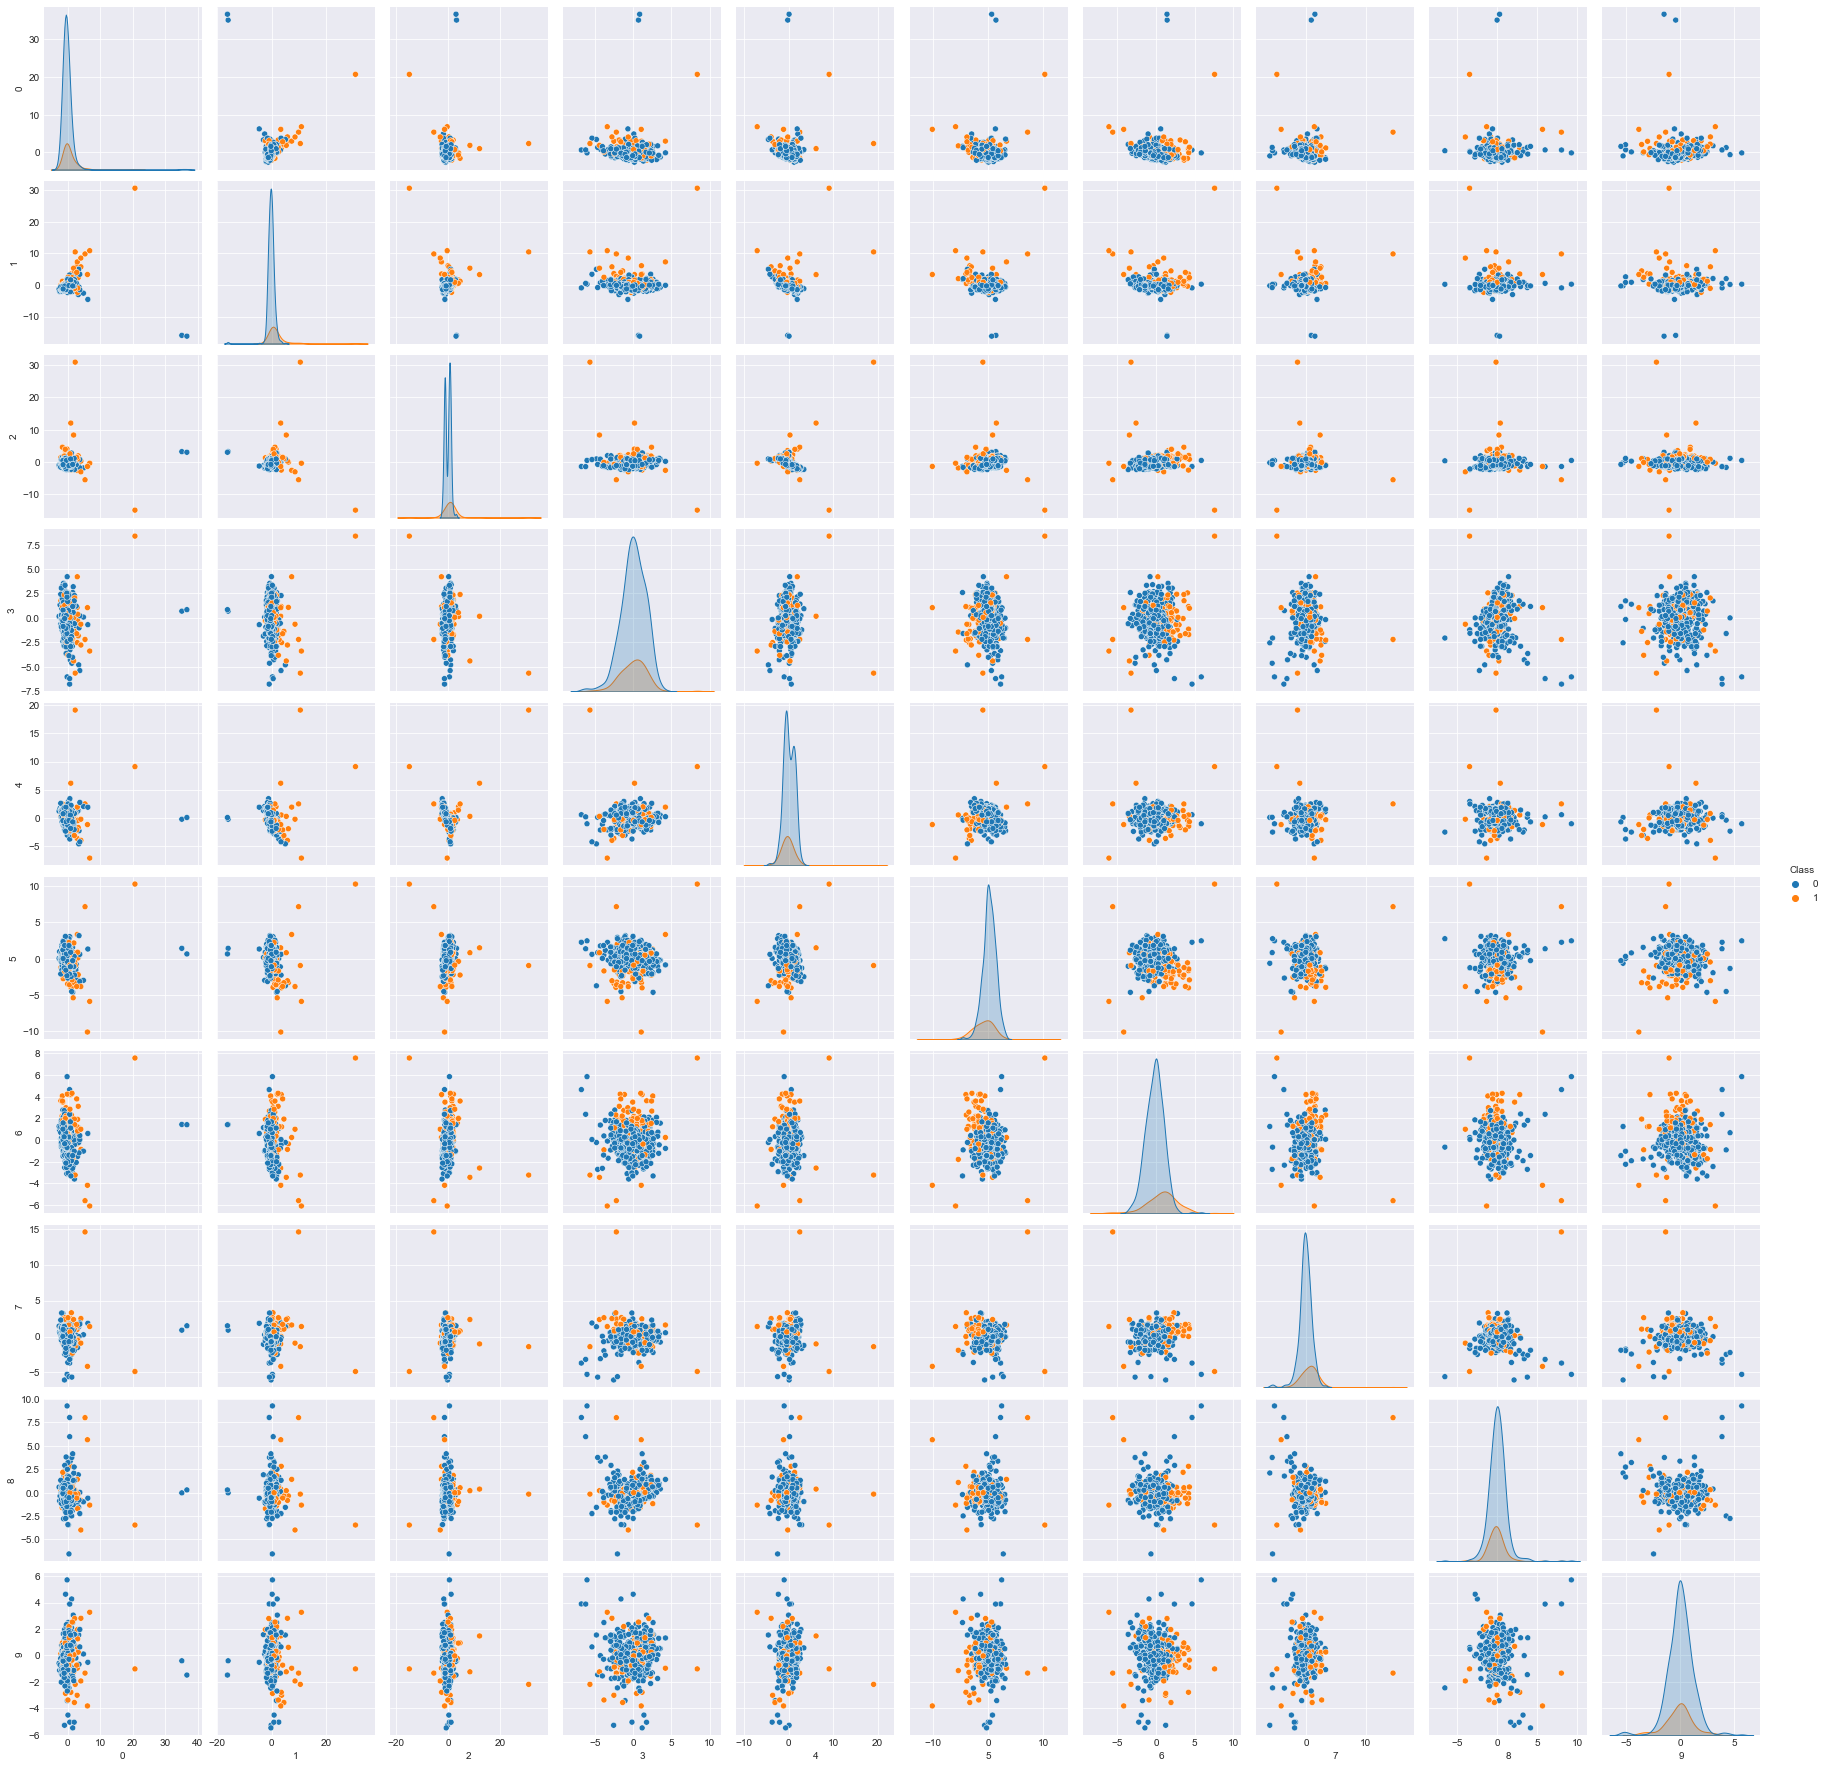

In [38]:
sns.pairplot(pca_df.iloc[:,:11],hue='Class',diag_kind='kde')

In [42]:
sum(train_y_full)

102

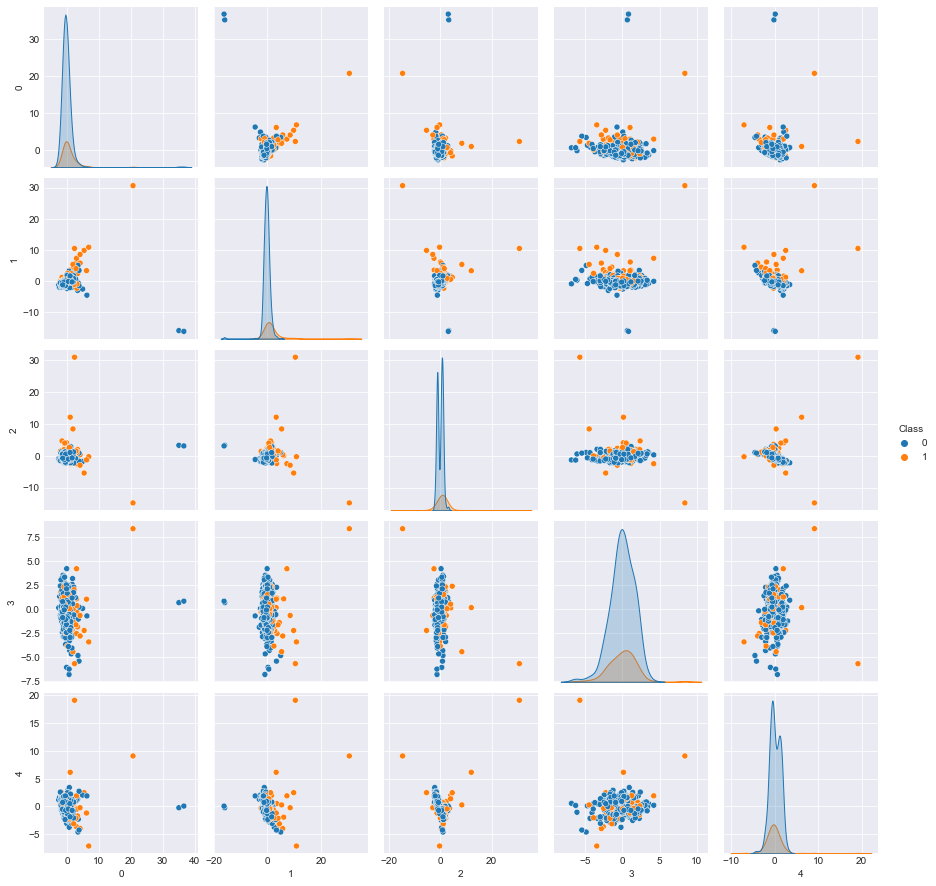

In [41]:
sns.pairplot(pca_df.iloc[:,:6],hue='Class',diag_kind='kde')

(-5.0, 5.0)

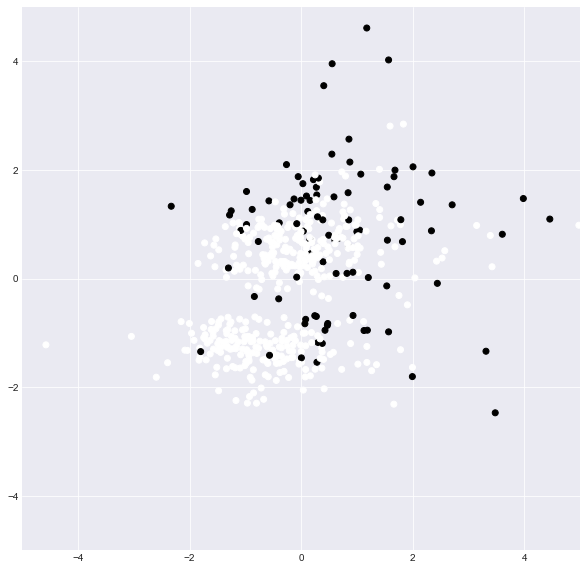

In [69]:
plt.figure(figsize=(10,10))
plt.scatter(pca_df[1],pca_df[2],c=pca_df['Class'])
plt.xlim(-5,5)
plt.ylim(-5,5)

In [139]:
#第2主成分と第3主成分で線形判別分析
qda = QDA()
qda.fit(pca_df[[1,2]].values,pca_df['Class'])
pred_y = qda.predict(pca_df[[1,2]].values)
confusion_matrix(pred_y,pca_df['Class'])

array([[441,  83],
       [  5,  19]], dtype=int64)

In [168]:
##第2主成分と第3主成分でランダムフォレスト
rfc = RFC(n_estimators=5)
rfc.fit(pca_df[[1,2]].values,pca_df['Class'])
pred_yr = rfc.predict(pca_df[[1,2]])
confusion_matrix(pca_df['Class'],pred_yr)

array([[442,   4],
       [  9,  93]], dtype=int64)

(-5.0, 5.0)

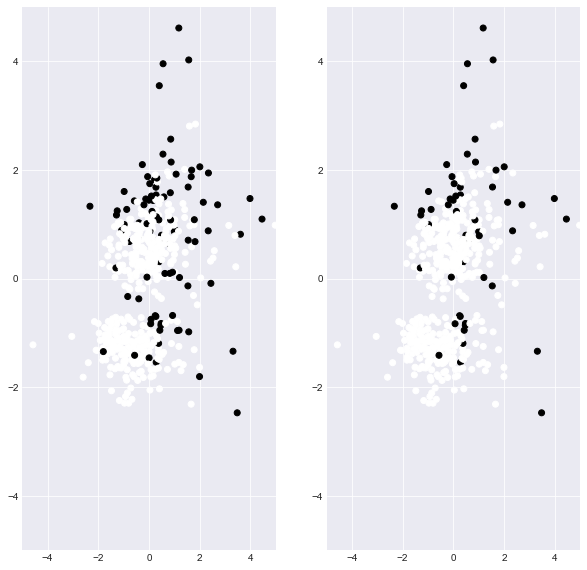

In [88]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(1,2,1)
ax1.scatter(pca_df[1],pca_df[2],c=pca_df['Class'])
plt.xlim(-5,5)
plt.ylim(-5,5)
ax2 = fig.add_subplot(1,2,2)
ax2.scatter(pca_df[1],pca_df[2],c=pca_df['rfc'])
plt.xlim(-5,5)
plt.ylim(-5,5)

In [89]:
confusion_matrix(pred_yr,pca_df['Class'])

array([[444,   9],
       [  2,  93]], dtype=int64)

(-5.0, 5.0)

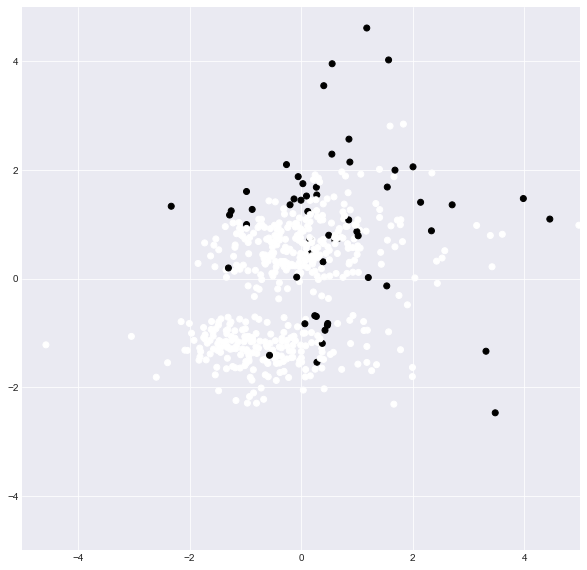

In [77]:
pca_df['rfc'] = pred_yr
plt.figure(figsize=(10,10))
plt.scatter(pca_df[1],pca_df[2],c=pca_df['rfc'])
plt.xlim(-5,5)
plt.ylim(-5,5)

(-5.0, 5.0)

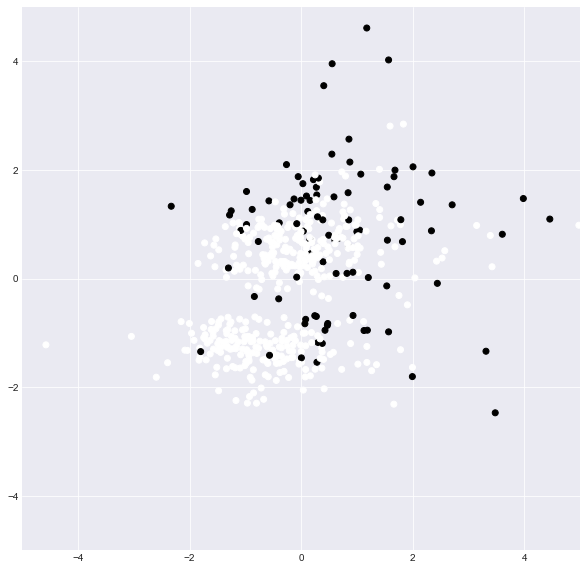

In [78]:
plt.figure(figsize=(10,10))
plt.scatter(pca_df[1],pca_df[2],c=pca_df['Class'])
plt.xlim(-5,5)
plt.ylim(-5,5)

(-5.0, 5.0)

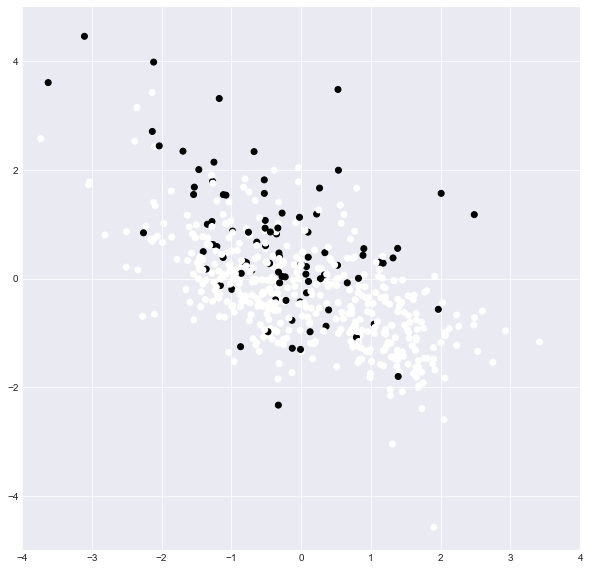

In [47]:
plt.figure(figsize=(10,10))
plt.scatter(pca_df[4],pca_df[1],c=pca_df['Class'])
plt.xlim(-4,4)
plt.ylim(-5,5)

(-4.0, 4.0)

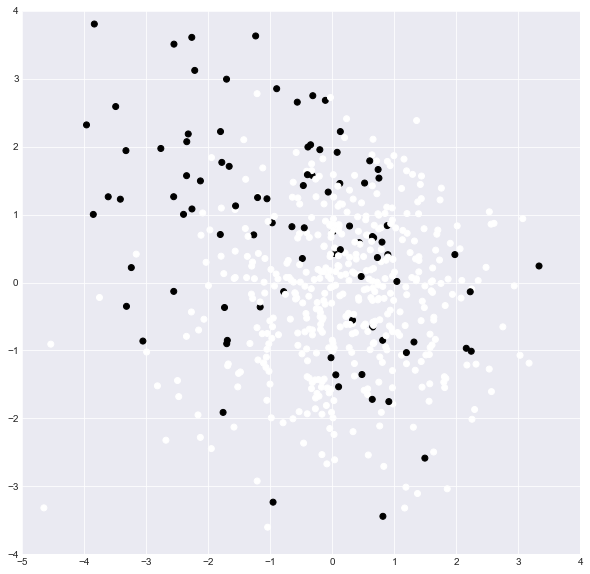

In [50]:
plt.figure(figsize=(10,10))
plt.scatter(pca_df[5],pca_df[6],c=pca_df['Class'])
plt.xlim(-5,4)
plt.ylim(-4,4)

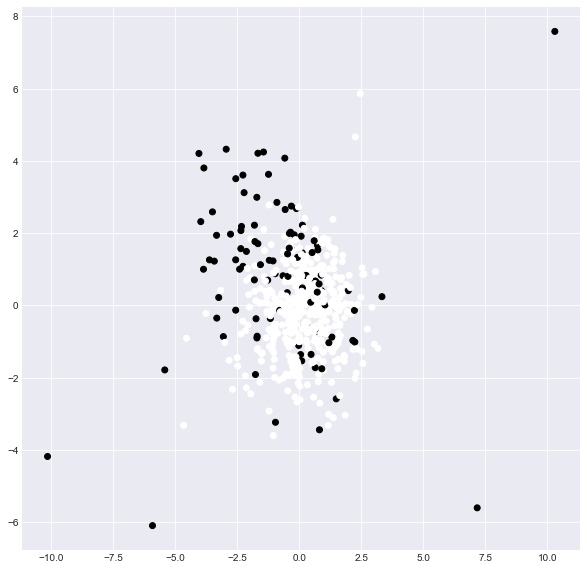

In [40]:
plt.figure(figsize=(10,10))
plt.scatter(pca_df[5],pca_df[6],c=pca_df['Class'])

(-5.0, 5.0)

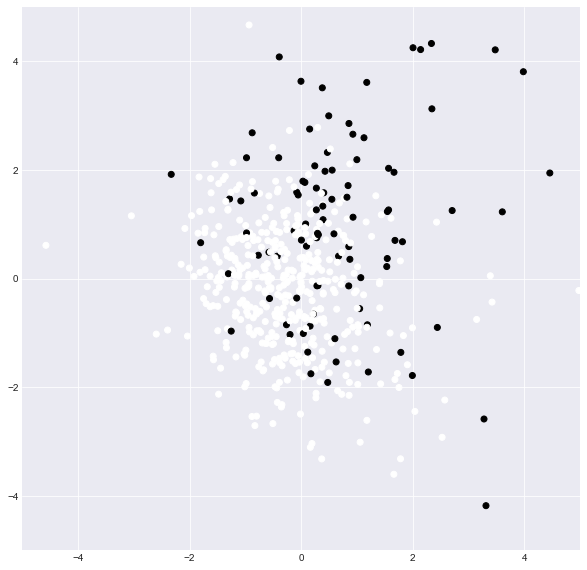

In [173]:
plt.figure(figsize=(10,10))
plt.scatter(pca_df[1],pca_df[6],c=pca_df['Class'])
plt.xlim(-5,5)
plt.ylim(-5,5)

In [174]:
##第2主成分と第3主成分でランダムフォレスト
rfc1 = RFC(n_estimators=5)
rfc1.fit(pca_df[[1,2]].values,pca_df['Class'])
pred_yr1 = rfc1.predict(pca_df[[1,6]])
confusion_matrix(pca_df['Class'],pred_yr1)

array([[360,  86],
       [ 42,  60]], dtype=int64)

In [241]:
#第N主成分までで寄与率~~%なのでＮまで使ってロジスティック回帰
n = 56
train_pca_x = pca.fit_transform(train_x_sc)
clf = LogisticRegression()
clf.fit(train_pca_x[:,:n],train_y_full)
pred_y = clf.predict(train_pca_x[:,:n])
clf.predict_proba(train_pca_x[:,:n])
clf.score(train_pca_x[:,:n],train_y_full)

0.9361313868613139

In [242]:
confusion_matrix(train_y_full,pred_y)

array([[436,  10],
       [ 25,  77]], dtype=int64)

In [243]:
clf2 = LogisticRegression()
clf2.fit(train_x_sc,train_y_full)
clf2.score(train_x_sc,train_y_full)

0.9361313868613139

In [244]:
#欠損値を補正したデータ
train_df_emb

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL
0,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,4126.58731,...,3.583450,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343
1,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,5496.92824,...,10.358927,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000
2,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,5135.78024,...,11.626917,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941
3,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,4169.67738,...,14.852022,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829
4,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,5728.73412,...,13.666727,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,0.149555,3130.05946,123.763599,9.513984,13.020852,3.499305,0.077343,8.545512,2.804172,4157.68439,...,9.879296,0.173229,1.26092,0.067730,8.967128,217.148554,8095.932828,24.640462,69.191944,21.978000
613,0.435846,5462.03438,85.200147,46.551007,15.973224,5.979825,0.025882,12.622906,3.777550,5654.07556,...,10.910227,10.223150,1.24236,0.426699,35.896418,496.994214,3085.308063,29.648928,124.808872,0.145340
614,0.427300,2459.10720,130.138587,55.355778,10.005552,8.070549,0.025578,15.408390,1.229900,5888.87769,...,12.029366,0.173229,0.49706,0.067730,19.962092,128.896894,6474.652866,26.166072,119.559420,21.978000
615,0.363205,1263.53524,85.200147,23.685856,8.138688,7.981959,0.025578,7.524588,1.229900,4517.86560,...,8.026928,9.256996,0.78764,0.670527,24.594488,72.611063,1965.343176,25.116750,37.155112,0.184622


In [274]:
#欠損値補間：重回帰分析
#学習に使用しなかった欠測データを含む列の予測を実施する
train_val = train_df_emb.loc[null_idx,:]
#標準化
train_val = scaler.transform(train_val)
#主成分得点
train_val_pca = pca.fit_transform(train_val)
#ロジスティック回帰
pred_null = clf.predict(train_val_pca)

In [286]:
clf.score(train_val_pca,train_y[null_idx])
confusion_matrix(pred_null,train_y[null_idx])

array([[54,  5],
       [ 9,  1]], dtype=int64)

In [292]:
confusion_matrix(train_y[null_idx],train_y[null_idx])

array([[63,  0],
       [ 0,  6]], dtype=int64)

In [98]:
train_val1

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL


In [124]:
train_val_pca1

array([[-1.03e+00,  9.09e-02, -3.90e-01, ..., -8.41e-03, -2.36e-03,
         1.10e-03],
       [-4.76e-01,  1.29e-01, -4.63e-01, ...,  9.39e-03, -2.61e-03,
         6.87e-03],
       [-1.38e+00, -7.42e-01, -8.01e-01, ...,  1.04e-02,  4.49e-03,
        -6.70e-04],
       ...,
       [-1.01e+00,  6.16e-03, -9.95e-01, ..., -1.89e-02,  1.03e-02,
        -7.54e-03],
       [ 2.19e-01,  1.31e+00, -8.88e-01, ...,  2.85e-03,  4.82e-03,
         6.76e-03],
       [-1.21e+00, -6.66e-01, -8.15e-01, ..., -1.44e-03, -9.61e-03,
         4.20e-03]])

In [171]:
#欠損値補間：平均値
#学習に使用しなかった欠測データを含む列の予測を実施する
train_val1 = train_df_emb_1.loc[null_idx,:]
#標準化
train_val1 = scaler.transform(train_val1)
#主成分得点
train_val_pca1 = pca.fit_transform(train_val1)
#ロジスティック回帰
pred_null1 = rfc.predict(train_val_pca1[:,1:3])

In [172]:
confusion_matrix(train_y[null_idx],pred_null1)

array([[49, 14],
       [ 4,  2]], dtype=int64)

In [178]:
train_val_pca2.shape(-1,2)

TypeError: 'tuple' object is not callable

In [181]:
train_val_pca2.reshape(-1,2)

array([[array([ 9.09e-02,  1.29e-01, -7.42e-01, -8.26e-01, -1.62e-01, -7.73e-01,
               -8.38e-02,  2.78e+00, -4.28e-01, -6.19e-01, -3.24e+00, -4.90e-01,
                1.85e+00,  2.77e-01, -3.09e-01, -9.53e-01, -1.46e+00,  3.96e-01,
               -1.56e+00, -1.66e+00, -1.19e+00,  3.27e-01,  2.86e+00, -9.91e-01,
                8.63e-01, -3.05e-01, -1.04e+00, -1.86e+00,  1.80e+00,  7.83e-01,
                3.12e-01, -1.08e+00,  9.80e-02, -1.13e-01, -2.58e-01,  2.53e+00,
               -5.49e-01, -1.49e-01, -1.25e+00, -1.08e+00,  7.23e-01, -2.83e+00,
                2.18e+01,  6.37e-01, -1.13e+00, -1.98e-01, -1.36e+00, -1.08e+00,
               -1.03e+00,  1.93e+00, -6.32e-01, -5.56e+00, -1.09e+00, -2.15e-01,
               -5.77e-01,  4.67e-02,  1.11e+00, -1.66e+00, -5.78e-01, -4.48e-01,
               -8.07e-01, -5.70e-01, -2.97e+00, -1.12e+00,  1.13e+00,  3.89e+00,
                6.16e-03,  1.31e+00, -6.66e-01])                                ,
        array([-0.08,  1.6 

In [185]:
train_val_pca2

array([array([ 9.09e-02,  1.29e-01, -7.42e-01, -8.26e-01, -1.62e-01, -7.73e-01,
              -8.38e-02,  2.78e+00, -4.28e-01, -6.19e-01, -3.24e+00, -4.90e-01,
               1.85e+00,  2.77e-01, -3.09e-01, -9.53e-01, -1.46e+00,  3.96e-01,
              -1.56e+00, -1.66e+00, -1.19e+00,  3.27e-01,  2.86e+00, -9.91e-01,
               8.63e-01, -3.05e-01, -1.04e+00, -1.86e+00,  1.80e+00,  7.83e-01,
               3.12e-01, -1.08e+00,  9.80e-02, -1.13e-01, -2.58e-01,  2.53e+00,
              -5.49e-01, -1.49e-01, -1.25e+00, -1.08e+00,  7.23e-01, -2.83e+00,
               2.18e+01,  6.37e-01, -1.13e+00, -1.98e-01, -1.36e+00, -1.08e+00,
              -1.03e+00,  1.93e+00, -6.32e-01, -5.56e+00, -1.09e+00, -2.15e-01,
              -5.77e-01,  4.67e-02,  1.11e+00, -1.66e+00, -5.78e-01, -4.48e-01,
              -8.07e-01, -5.70e-01, -2.97e+00, -1.12e+00,  1.13e+00,  3.89e+00,
               6.16e-03,  1.31e+00, -6.66e-01])                                ,
       array([-0.08,  1.6 ])], dtype=ob

In [184]:
#ロジスティック回帰
train_val_pca2 = np.concatenate([train_val_pca1[:,1],train_val_pca2[:,6]],1)
pred_null2 = rfc1.predict(train_val_pca2.reshape(-1,2))

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [ ]:
confusion_matrix(train_y[null_idx],pred_null1)

In [169]:
#欠損値補間：最頻値
#学習に使用しなかった欠測データを含む列の予測を実施する
train_val2 = train_df_emb_2.loc[null_idx,:]
#標準化
train_val2 = scaler.transform(train_val2)
#主成分得点
train_val_pca2 = pca.fit_transform(train_val2)
#ロジスティック回帰
pred_null2 = clf.predict(train_val_pca2)

NameError: name 'clf' is not defined

In [170]:
confusion_matrix(pred_null2,train_y[null_idx])

NameError: name 'pred_null2' is not defined

In [298]:
#結論→欠損値の穴埋めはどれでやっても分類精度に差が出なかった
#このノートのパイプライン概要
#欠損値を含む行を抜粋
#欠損値を含まない行のデータ(548/617)の相関行列を主成分分析
#主成分得点でロジスティック回帰
#訓練データの正解率は93.6%、再現率は(77/87)
#検証データの正解率は～～%、再現率は(1/6)
#欠損値の穴埋め方法は
#①欠損を含まない説明変数から重回帰分析で予測
#②平均値で穴埋め
#③最頻値で穴埋め